# Generate Animations of Single Simulations

In [1]:
# imports
from pathlib import Path
from functools import partial
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from simulation import Simulation


# set plotting style
plt.style.use(['default', 'biophysics.mplstyle'])

# define figure and animation save directory
fig_dir = Path('figures/single_sim_plots')
fig_dir.mkdir(parents=True, exist_ok=True)
anim_dir = Path('animations/')
anim_dir.mkdir(parents=True, exist_ok=True)

# import simulation data to the Simulation class
sim = Simulation(Path('data/tests/simulation.mat'))

Running self check on 'simulation'

Warning: Grid count changed by 2 at step 634

Warning: Simulation 'simulation' failed self-check

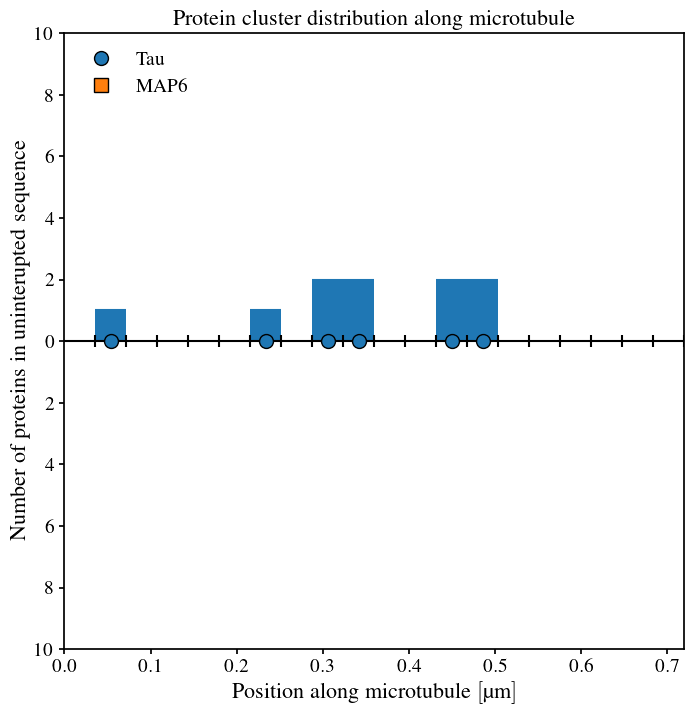

In [2]:
# plot sequence to check plotting parameters
fig, ax = plt.subplots()
sim.plot_sequence_at(
    step=50,
    ax=ax,
    max_len=False,
    plot_points=True,
    point_domain_ticks=True,
)

# save figure
# fig_file = fig_dir / f"sequence_plot_{sim.get_name()}"
# fig.savefig(fig_file)

Generating Animation: 'sequence_animation_simulation.mp4': 100%|██████████| 1001/1001 [10:08<00:00,  1.64it/s]


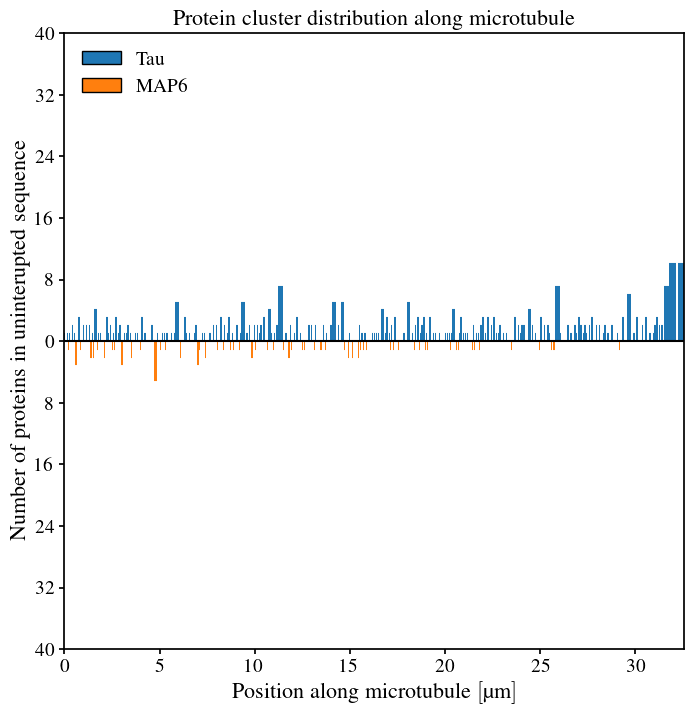

In [5]:
# animate simulation
fig, ax = plt.subplots()

# define the animation function
def animate(step: int, ax: Axes, sim: Simulation, ymax: float) -> None:
    # clear the axes
    ax.clear()

    # plot the simulation at the current time step
    sim.plot_sequence_at(
        step=step,
        ax=ax,
        ymax_override=ymax
    )

# define the function handle
ymax_override = sim.get_longest_seq()
anim_handle = partial(animate, ax=ax, sim=sim, ymax=ymax_override)

# generate the animation
anim_file = anim_dir / f"sequence_animation_{sim.get_name()}.mp4"
sim.animate_sequences(fig, anim_handle, anim_file)

# do not show the plot
plt.close(fig)